# Exploratory Data Analysis

Roles to Explore

## What are the most demanded skills for the top 3 most popular data roles (2)

### Methodology
1. Clean up skill column
2. Calculate skill count based on job_title_short
3. Plot initial findings
4. Calculate skill percentage
5. Plot final findings

## How well do jobs and skills pay for Data Analysts? (3)

### Methodology
1. Evaluate median salary for all data jobs
2. Find median salary per skill for Data Analysts
3. Visualize for highest paying skills
4. Visualize for highest demanded skills

## How well do jobs and skills pay for Data Analysts? (3)

### Methodology
1. Evaluate median salary for all data jobs
2. Find median salary per skill for Data Analysts
3. Visualize for highest paying skills
4. Visualize for highest demanded skills

## What is the most optimal skill to learn for Data Analysts? (5)

### Methodology
1. Continue from last notebook to find percent of postings with skill
2. Visualize median salary vs percent skill demand
3. (Optional) Determine if certain technologies are more prevalent

In [2]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

In [3]:
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

In [4]:
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x : ast.literal_eval(x) if pd.notna(x) else x)

## Filter for US Data Analyst Roles

In [5]:
df_da_us = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')]
df_da_us

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
36,Data Analyst,Data Analyst,"Des Moines, IA",via Trabajo.org,Full-time,False,"Illinois, United States",2023-11-06 13:01:22,False,True,United States,None,NaN,NaN,Assuredpartners,None,None
68,Data Analyst,Sr. Research Data Analyst,"Baltimore, MD",via ZipRecruiter,Full-time,False,"New York, United States",2023-03-24 13:01:00,False,False,United States,None,NaN,NaN,Johns Hopkins Medicine,"[r, zoom]","{'programming': ['r'], 'sync': ['zoom']}"
73,Data Analyst,Entry level / Systems Data Analyst (Remote),Anywhere,via LinkedIn,Contractor,True,"Illinois, United States",2023-06-16 13:18:22,True,True,United States,None,NaN,NaN,Soft Magic,"[word, excel, powerpoint, outlook]","{'analyst_tools': ['word', 'excel', 'powerpoin..."
79,Data Analyst,Data Analyst/Report Writer,"Austin, TX",via Jobs Trabajo.org,Full-time,False,"Texas, United States",2023-08-07 13:18:27,True,False,United States,None,NaN,NaN,Nesco Resource,"[sas, sas, word, excel]","{'analyst_tools': ['sas', 'word', 'excel'], 'p..."
93,Data Analyst,IT Finance / TBM Data Analyst - Remote | WFH,Anywhere,via LinkedIn,Full-time,True,"New York, United States",2023-06-10 13:00:05,False,False,United States,None,NaN,NaN,Get It Recruit - Information Technology,"[oracle, azure, power bi, excel, word, powerpo...","{'analyst_tools': ['power bi', 'excel', 'word'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785603,Data Analyst,Junior Data Analyst,"Santa Monica, CA",via Trabajo.org,Full-time,False,"California, United States",2023-09-12 06:00:50,False,False,United States,None,NaN,NaN,"Ramax Search, Inc.","[sql, vba, python, excel, flow]","{'analyst_tools': ['excel'], 'other': ['flow']..."
785626,Data Analyst,Data Acquisition Associate,"Tarrytown, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-29 06:01:29,False,False,United States,None,NaN,NaN,Planet Group,[microsoft teams],{'sync': ['microsoft teams']}
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc","[sql, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None


In [9]:
df_plot = df_da_us['job_location'].value_counts().head(10).to_frame()

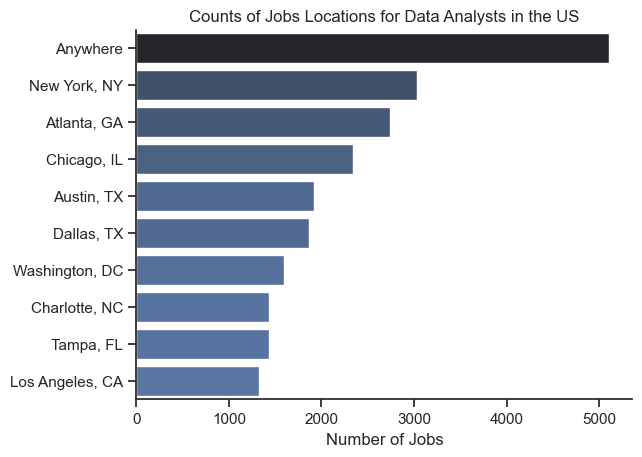

In [16]:
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of Jobs Locations for Data Analysts in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

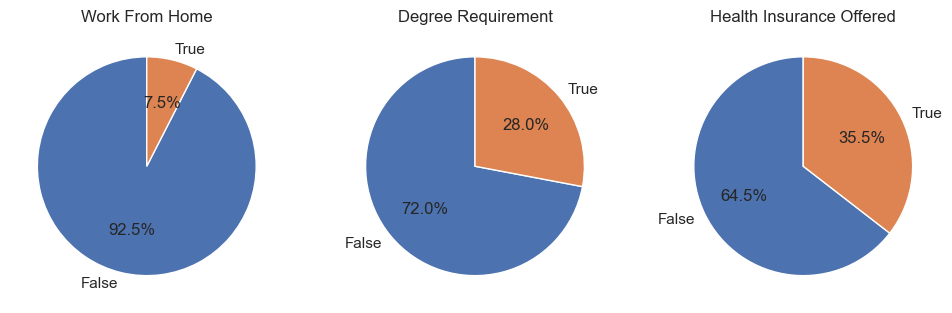

In [18]:
dict_column = {
    'job_work_from_home' : 'Work From Home',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1,3)
fig.set_size_inches((12,5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_da_us[column].value_counts(), labels=['False', 'True'], autopct= '%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.show()

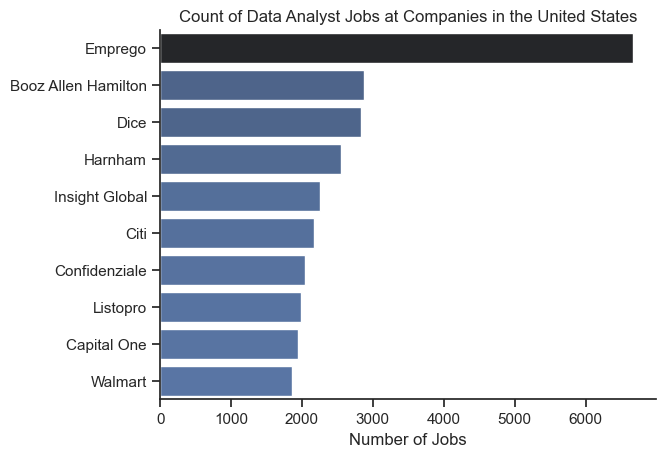

In [25]:
df_plot2 = df['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')

sns.barplot(data=df_plot2, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title("Count of Data Analyst Jobs at Companies in the United States")
plt.xlabel("Number of Jobs")
plt.ylabel('')
plt.show()